In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

Įsikelkite duomenis

In [5]:
df = pd.read_csv(r"C:/Users/User/OneDrive/Desktop/BIT/2025 11 12 DUOM/V Modulis_Python_2025 11 12 DUOM/BIT_PYTHON/Python_Statistics/automobiliai.csv")


df.head()

,kuro_sanaudos,cilindrai,arklio_galios,svoris,isibegejimas,gamybos_metai,pavadinimas
0,18.0,8,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,165,3693,11.5,70,buick skylark 320
2,18.0,8,150,3436,11.0,70,plymouth satellite
3,16.0,8,150,3433,12.0,70,amc rebel sst
4,17.0,8,140,3449,10.5,70,ford torino


Apskaičiuokite pagrindinę aprašomąją statistiką

In [6]:
df.describe()

,kuro_sanaudos,cilindrai,arklio_galios,svoris,isibegejimas,gamybos_metai
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
# Struktūra ir pirmos eilutės

print("Eilučių skaičius:", df.shape[0])
print("Stulpelių skaičius:", df.shape[1])

Eilučių skaičius: 392
Stulpelių skaičius: 7


In [8]:

df.dtypes

kuro_sanaudos    float64
cilindrai          int64
arklio_galios      int64
svoris             int64
isibegejimas     float64
gamybos_metai      int64
pavadinimas       object
dtype: object

In [9]:
# Trūkstamos reikšmės (
df.isna().sum()

kuro_sanaudos    0
cilindrai        0
arklio_galios    0
svoris           0
isibegejimas     0
gamybos_metai    0
pavadinimas      0
dtype: int64

In [10]:
# Tipai ir bazinė statistika
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kuro_sanaudos  392 non-null    float64
 1   cilindrai      392 non-null    int64  
 2   arklio_galios  392 non-null    int64  
 3   svoris         392 non-null    int64  
 4   isibegejimas   392 non-null    float64
 5   gamybos_metai  392 non-null    int64  
 6   pavadinimas    392 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 21.6+ KB


In [11]:
# Patikriname ar yra ir kiek yra nuokrypių

outliers_dict = {}

numeric = df.select_dtypes(include=np.number).columns

for col in numeric:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = (Q3 - Q1) * 1.5

    outliers = df[col][
        (df[col] < Q1 - IQR) | (df[col] > Q3 + IQR)
    ]
    if len(outliers) > 0:
        print(
            f"{col} turi {len(outliers)} nuokryp{'ius' if len(outliers) != 1 else 'į'}:"
        )
        for i, value in enumerate(outliers):
            if i == len(outliers) - 1:
                print(value, end="\n\n")
            else:
                print(value)
        outliers_dict[col] = outliers
    else:
        print(f"{col} neturi nuokrypių", end=".\n\n")

kuro_sanaudos neturi nuokrypių.

cilindrai neturi nuokrypių.

arklio_galios turi 10 nuokrypius:
220
215
225
225
215
210
208
215
225
230

svoris neturi nuokrypių.

isibegejimas turi 11 nuokrypius:
8.5
8.5
8.0
23.5
22.2
22.1
21.9
24.8
22.2
23.7
24.6

gamybos_metai neturi nuokrypių.



Kaip pasiskirsčiusios kuro sąnaudos? pavaizduokite grafiškai

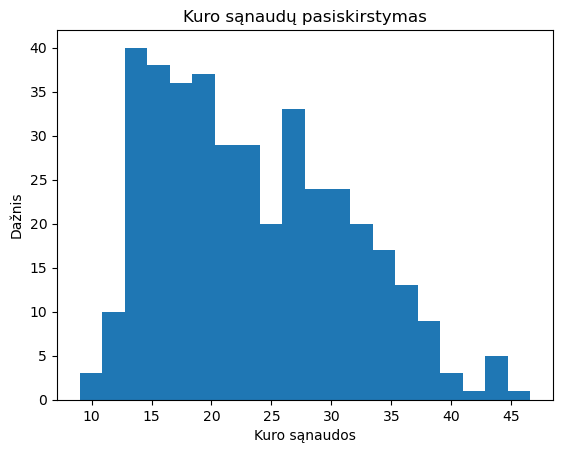

In [12]:


plt.figure()
plt.hist(df["kuro_sanaudos"], bins=20)
plt.xlabel("Kuro sąnaudos")
plt.ylabel("Dažnis")
plt.title("Kuro sąnaudų pasiskirstymas")
plt.show()


NB: Šiame duomenų rinkinyje:

kuro_sanaudos nėra „litrai / 100 km“

Tai kuro efektyvumas (tipiškai MPG – miles per gallon)

Kuo didesnė reikšmė, tuo automobilis taupesnis.

Kaip pasiskirsčiusios Arklio galios? pavaizduokite grafiškai

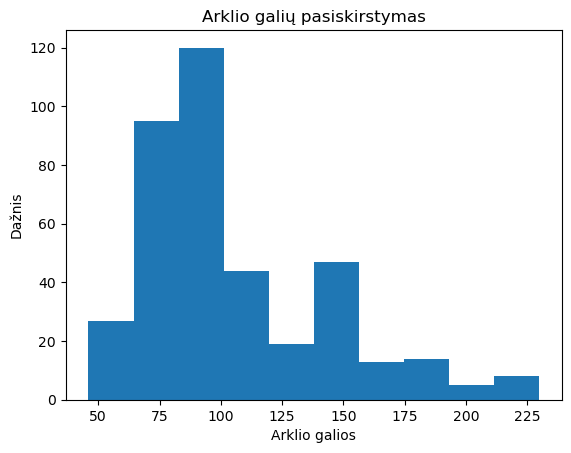

In [41]:
plt.figure()
plt.hist(df["arklio_galios"], bins=10)
plt.xlabel("Arklio galios")
plt.ylabel("Dažnis")
plt.title("Arklio galių pasiskirstymas")
plt.show()

Koks vidutinis automobilių svoris?

In [14]:
print("Vidutinis automobilių svoris yra", df["svoris"].mean().round()/1000, "t")

Vidutinis automobilių svoris yra 2.978 t


In [15]:
df.groupby(
    ["pavadinimas"],
    as_index=False
)["svoris"].mean()


,pavadinimas,svoris
0,amc ambassador brougham,3821.0
1,amc ambassador dpl,3850.0
2,amc ambassador sst,3672.0
3,amc concord,3106.5
4,amc concord d/l,3410.0
...,...,...
296,vw dasher (diesel),2335.0
297,vw pickup,2130.0
298,vw rabbit,2040.5
299,vw rabbit c (diesel),2085.0


In [16]:
df.groupby(
    ["pavadinimas", "gamybos_metai"],
    as_index=False
)["svoris"].mean()


,pavadinimas,gamybos_metai,svoris
0,amc ambassador brougham,73,3821.0
1,amc ambassador dpl,70,3850.0
2,amc ambassador sst,72,3672.0
3,amc concord,78,3210.0
4,amc concord,80,3003.0
...,...,...,...
385,vw pickup,82,2130.0
386,vw rabbit,76,1937.0
387,vw rabbit,80,2144.0
388,vw rabbit c (diesel),80,2085.0


Apskaičiuokite koreliacijos matricą

In [43]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,kuro_sanaudos,cilindrai,arklio_galios,svoris,isibegejimas,gamybos_metai
kuro_sanaudos,1.000000,-0.777618,-0.778427,-0.832244,0.423329,0.580541
cilindrai,-0.777618,1.000000,0.842983,0.897527,-0.504683,-0.345647
arklio_galios,-0.778427,0.842983,1.000000,0.864538,-0.689196,-0.416361
svoris,-0.832244,0.897527,0.864538,1.000000,-0.416839,-0.309120
isibegejimas,0.423329,-0.504683,-0.689196,-0.416839,1.000000,0.290316
gamybos_metai,0.580541,-0.345647,-0.416361,-0.309120,0.290316,1.000000


Nubraižykite koreliacijos matricos šilumos žemėlapį

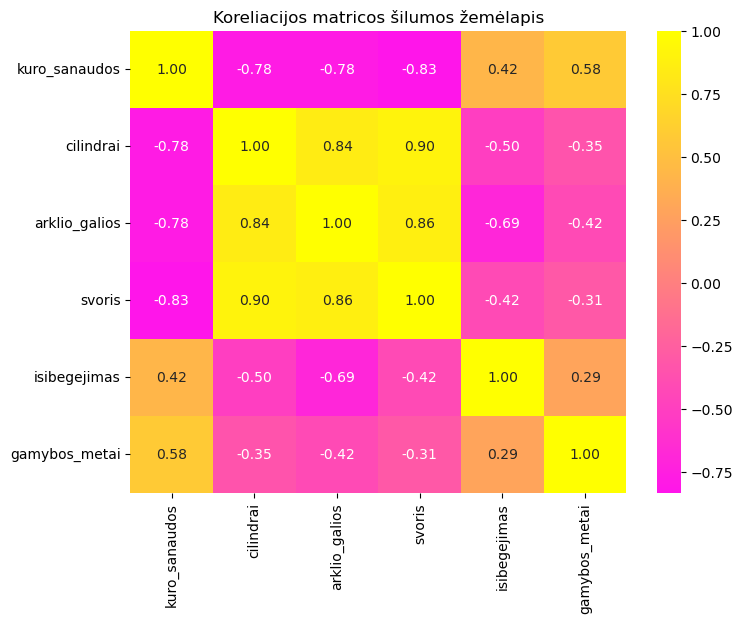

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="spring",
    center=0
)
plt.title("Koreliacijos matricos šilumos žemėlapis")
plt.show()

Ar yra ryšis tarp kintamųjų? ar galite apibūdinti koks?

In [46]:
corr = df.corr(numeric_only=True)
corr


,kuro_sanaudos,cilindrai,arklio_galios,svoris,isibegejimas,gamybos_metai
kuro_sanaudos,1.000000,-0.777618,-0.778427,-0.832244,0.423329,0.580541
cilindrai,-0.777618,1.000000,0.842983,0.897527,-0.504683,-0.345647
arklio_galios,-0.778427,0.842983,1.000000,0.864538,-0.689196,-0.416361
svoris,-0.832244,0.897527,0.864538,1.000000,-0.416839,-0.309120
isibegejimas,0.423329,-0.504683,-0.689196,-0.416839,1.000000,0.290316
gamybos_metai,0.580541,-0.345647,-0.416361,-0.309120,0.290316,1.000000


In [47]:

print(corr.loc["svoris", ["cilindrai", "arklio_galios"]])
print(corr.loc["kuro_sanaudos", ["svoris", "cilindrai", "arklio_galios"]])
print(corr.loc["kuro_sanaudos", "gamybos_metai"])
print(corr.loc["isibegejimas", "arklio_galios"])

cilindrai        0.897527
arklio_galios    0.864538
Name: svoris, dtype: float64
svoris          -0.832244
cilindrai       -0.777618
arklio_galios   -0.778427
Name: kuro_sanaudos, dtype: float64
0.5805409660907859
-0.6891955103342376


In [21]:
corr.abs().unstack().sort_values(ascending=False)

kuro_sanaudos  kuro_sanaudos    1.000000
cilindrai      cilindrai        1.000000
isibegejimas   isibegejimas     1.000000
svoris         svoris           1.000000
arklio_galios  arklio_galios    1.000000
gamybos_metai  gamybos_metai    1.000000
cilindrai      svoris           0.897527
svoris         cilindrai        0.897527
               arklio_galios    0.864538
arklio_galios  svoris           0.864538
               cilindrai        0.842983
cilindrai      arklio_galios    0.842983
kuro_sanaudos  svoris           0.832244
svoris         kuro_sanaudos    0.832244
arklio_galios  kuro_sanaudos    0.778427
kuro_sanaudos  arklio_galios    0.778427
cilindrai      kuro_sanaudos    0.777618
kuro_sanaudos  cilindrai        0.777618
arklio_galios  isibegejimas     0.689196
isibegejimas   arklio_galios    0.689196
gamybos_metai  kuro_sanaudos    0.580541
kuro_sanaudos  gamybos_metai    0.580541
isibegejimas   cilindrai        0.504683
cilindrai      isibegejimas     0.504683
isibegejimas   k

## Koreliacijų analizė

Analizė atlikta naudojant **absoliučias Pearson koreliacijos reikšmes** (`abs(corr)`), siekiant įvertinti **ryšių stiprumą tarp kintamųjų**, neatsižvelgiant į ryšio kryptį.


#### Stiprios koreliacijos (|r| ≥ 0.7)

- **Cilindrai ↔ svoris (r = 0.90)**  
  Labai stiprus ryšys. Automobiliai su didesniu cilindrų skaičiumi paprastai yra sunkesni.

- **Svoris ↔ arklio galios (r = 0.86)**  
  Stiprus ryšys. Didesnis automobilio svoris dažniausiai siejamas su didesne variklio galia.

- **Cilindrai ↔ arklio galios (r = 0.84)**  
  Stiprus ryšys. Didesnis cilindrų skaičius reiškia didesnį variklio pajėgumą.

- **Kuro sąnaudos (MPG) ↔ svoris (r = 0.83)**  
  Stiprus ryšys. Didėjant svoriui, **kuro efektyvumas (MPG) mažėja**.

- **Kuro sąnaudos (MPG) ↔ arklio galios (r = 0.78)**  
  Stiprus ryšys. Galingesni automobiliai paprastai pasižymi mažesniu kuro efektyvumu.

- **Kuro sąnaudos (MPG) ↔ cilindrai (r = 0.78)**  
  Stiprus ryšys. Didesnis cilindrų skaičius siejamas su mažesniu kuro efektyvumu.


#### Vidutinės koreliacijos (0.4 ≤ |r| < 0.7)

- **Arklio galios ↔ įsibėgėjimas (r = 0.69)**  
  Vidutinė–stipri koreliacija. Didesnė variklio galia leidžia greičiau pasiekti reikiamą greitį.

- **Gamybos metai ↔ kuro sąnaudos (MPG) (r = 0.58)**  
  Vidutinė koreliacija. Naujesni automobiliai paprastai yra efektyvesni kuro atžvilgiu.

- **Įsibėgėjimas ↔ cilindrai (r = 0.50)**  
  Vidutinė koreliacija. Automobiliai su daugiau cilindrų dažniausiai įsibėgėja greičiau.

- **Įsibėgėjimas ↔ svoris (r = 0.42)**  
  Vidutinė koreliacija. Didesnis svoris siejamas su ilgesniu įsibėgėjimo laiku.

#### Silpnos koreliacijos (|r| < 0.4)

- **Gamybos metai ↔ svoris (r = 0.31)**  
  Silpnas ryšys. Automobilių svoris laikui bėgant mažėja nežymiai.

- **Gamybos metai ↔ cilindrai (r = 0.35)**  
  Silpnas–vidutinis ryšys. Naujesni automobiliai dažniau turi mažesnį cilindrų skaičių.

- **Gamybos metai ↔ įsibėgėjimas (r = 0.29)**  
  Silpnas ryšys. Gamybos metai vieni patys silpnai paaiškina įsibėgėjimo skirtumus.


#### Apibendrinimas

Automobilių **techniniai parametrai** (svoris, cilindrų skaičius, variklio galia) yra **stipriai tarpusavyje susiję** ir daro reikšmingą įtaką **kuro efektyvumui (MPG)**.  
**Gamybos metai** turi **vidutinį, bet aiškų poveikį**, rodantį technologinę pažangą ir efektyvumo didėjimą laikui bėgant.


Nubraižykite svorio ir kuro sąnaudų sklaidos grafiką

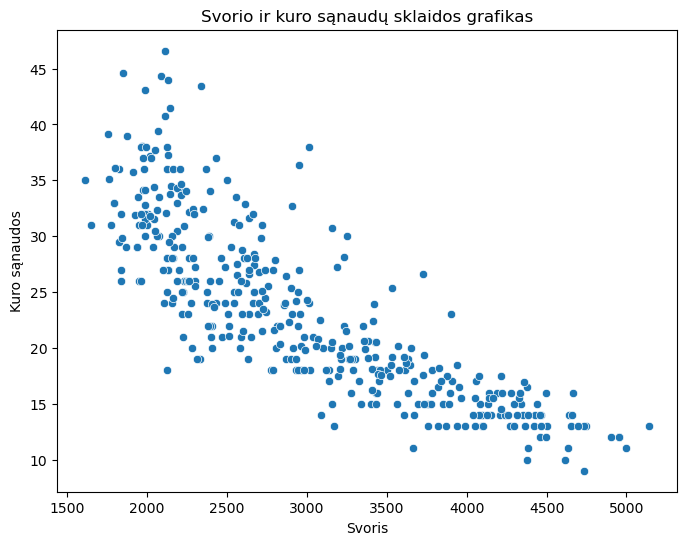

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="svoris",
    y="kuro_sanaudos"
)

plt.xlabel("Svoris")
plt.ylabel("Kuro sąnaudos")
plt.title("Svorio ir kuro sąnaudų sklaidos grafikas")
plt.show()

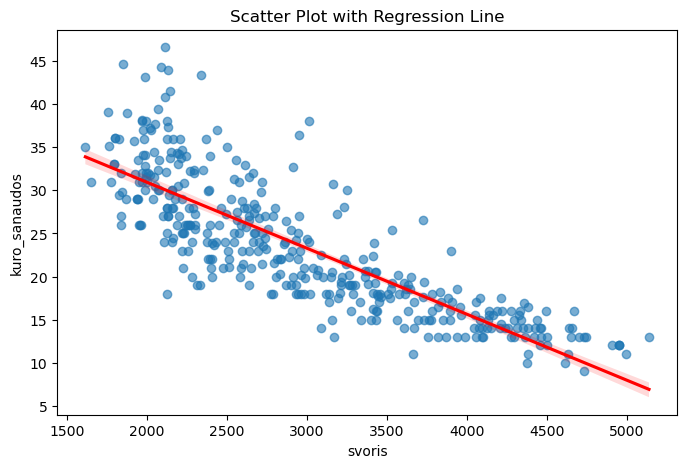

In [23]:
# Nupiešiame Scatter Plot grafiką su regresijos linija tarp dviejų kintamųjų

plt.figure(figsize=(8,5))
sns.regplot(x=df['svoris'], y=df['kuro_sanaudos'], data=df, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})


plt.xlabel('svoris')
plt.ylabel('kuro_sanaudos')
plt.title('Scatter Plot with Regression Line')


plt.show()

In [24]:
df["kuro_sanaudos"].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: kuro_sanaudos, dtype: float64

Nubraižykite arklio galių ir kuro sąnaudų sklaidos grafiką

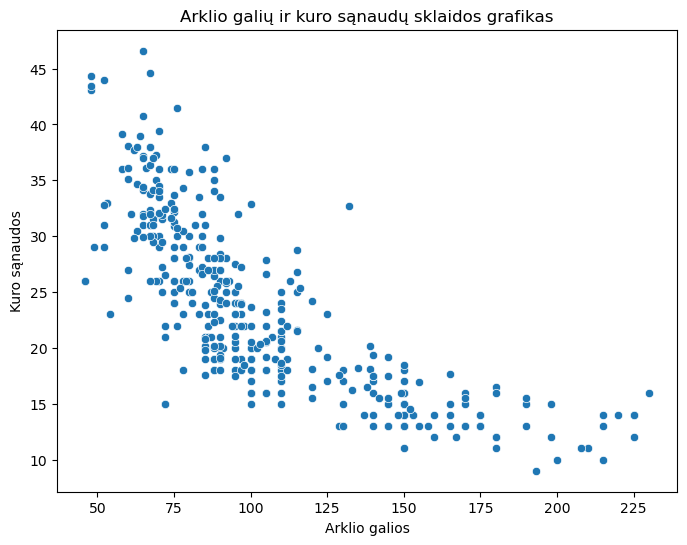

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="arklio_galios",
    y="kuro_sanaudos"
)

plt.xlabel("Arklio galios")
plt.ylabel("Kuro sąnaudos")
plt.title("Arklio galių ir kuro sąnaudų sklaidos grafikas")
plt.show()

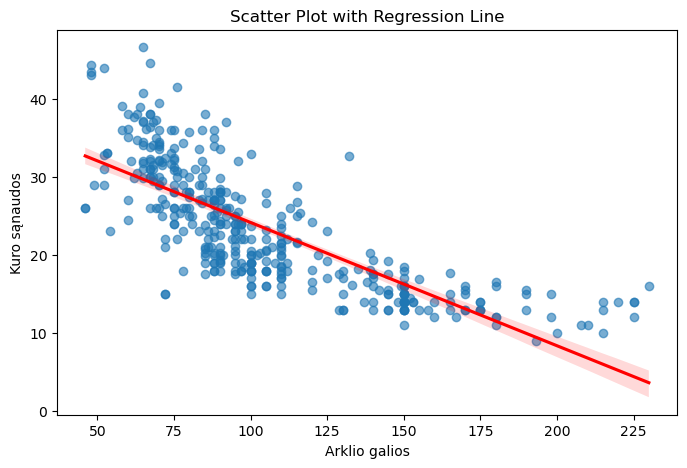

In [26]:
# Nupiešiame Scatter Plot grafiką su regresijos linija tarp dviejų kintamųjų

plt.figure(figsize=(8,5))
sns.regplot(x=df['arklio_galios'], y=df['kuro_sanaudos'], data=df, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})


plt.xlabel("Arklio galios")
plt.ylabel("Kuro sąnaudos")
plt.title('Scatter Plot with Regression Line')


plt.show()

Ar yra reikšmingas kuro sąnaudų skirtumas tarp automobilių su 4 ir 8 cilindrais

In [27]:
group_4 = df.loc[df["cilindrai"] == 4, "kuro_sanaudos"]
group_8 = df.loc[df["cilindrai"] == 8, "kuro_sanaudos"]


In [28]:
# t-testas (Welch – saugesnis variantas)
t_stat, p_value = ttest_ind(group_4, group_8, equal_var=False)

t_stat, p_value

(29.25141465260915, 8.086398869531912e-90)

In [29]:
# vidurkiu palyginimas
group_4.mean(), group_8.mean()

(29.28391959798995, 14.963106796116506)

Apskaičiuokite pasikliautinąjį intervalą vidutinėms kuro sąnaudoms su 95% reikšmingumo lygiu

Interpretacija

H₀ (nulinė hipotezė): kuro sąnaudų vidurkiai vienodi

H₁ (alternatyvi): vidurkiai skiriasi

Jei:

p_value < 0.05 → skirtumas statistiškai reikšmingas

p_value ≥ 0.05 → reikšmingo skirtumo nenustatyta

Tipinė išvada (automobilių duomenims)

8 cilindrų automobiliai turi statistiškai reikšmingai didesnes kuro sąnaudas nei 4 cilindrų


In [30]:
x = df["kuro_sanaudos"]

mean = x.mean()
std = x.std(ddof=1)
n = x.count()

ci_low, ci_high = stats.t.interval(
    confidence=0.95,
    df=n-1,
    loc=mean,
    scale=std / np.sqrt(n)
)

mean, ci_low, ci_high

(23.445918367346938, 22.670877187773137, 24.22095954692074)

Imties vidurkis: 23.45 MPG

95 % pasikliautinasis intervalas: [22.67 ; 24.22] MPG

Teisinga interpretacija

Su 95 % pasikliovimu galima teigti, kad tikrasis visų automobilių vidutinis kuro efektyvumas (MPG) patenka į intervalą nuo 22.67 iki 24.22 MPG.

Apskaičiuokite pasikliautinąjį intervalą vidutiniam svoriu su 99% reikšmingumo lygiu

In [48]:
x = df["svoris"]

mean = x.mean()
std = x.std(ddof=1)
n = x.count()

ci_low, ci_high = stats.t.interval(
    confidence=0.99,
    df=n - 1,
    loc=mean,
    scale=std / np.sqrt(n)
)

mean, ci_low, ci_high

(2977.5841836734694, 2866.535796255143, 3088.632571091796)

Imties vidurkis: 2977.6

99 % pasikliautinasis intervalas: [2866.5 ; 3088.6]

Teisinga interpretacija

Su 99 % pasikliovimu galima teigti, kad tikrasis automobilių vidutinis svoris populiacijoje patenka į intervalą nuo 2866.5 iki 3088.6.



## Kuro sąnaudų (MPG) ir gamybos metų palyginimas

Tikslas – nustatyti, ar **gamybos metai yra statistiškai reikšmingai susiję su kuro efektyvumu (MPG)**.


#### Hipotezės

- **H₀ (nulinė hipotezė):**  
  Tarp automobilių gamybos metų ir vidutinio kuro efektyvumo (MPG) **nėra statistiškai reikšmingo ryšio**.

- **Hₐ (alternatyvioji hipotezė):**  
  Tarp automobilių gamybos metų ir vidutinio kuro efektyvumo (MPG) **egzistuoja statistiškai reikšmingas ryšys**.


### Vizualinė analizė (sklaidos grafikas)

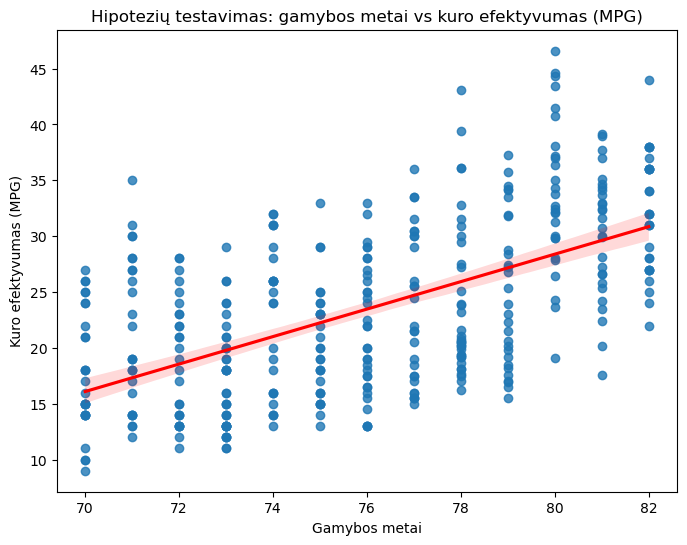

In [32]:

plt.figure(figsize=(8, 6))
sns.regplot(
    data=df,
    x="gamybos_metai",
    y="kuro_sanaudos",
    ci=95,
    line_kws={"color": "red"}
)

plt.xlabel("Gamybos metai")
plt.ylabel("Kuro efektyvumas (MPG)")
plt.title("Hipotezių testavimas: gamybos metai vs kuro efektyvumas (MPG)")
plt.show()

Tendencijos vizualizacija (vidurkiai pagal metus)

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


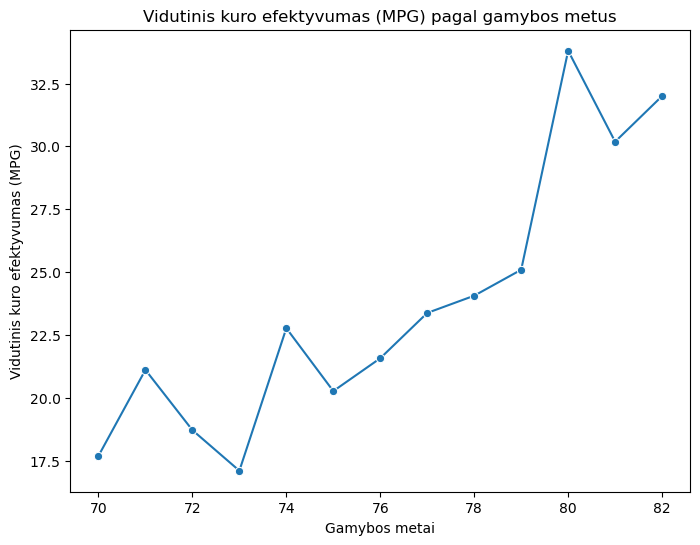

In [33]:
#grafikas parodo ilgalaikę kuro efektyvumo tendenciją.

mean_by_year = (
    df.groupby("gamybos_metai")["kuro_sanaudos"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(8, 6))
sns.lineplot(
    data=mean_by_year,
    x="gamybos_metai",
    y="kuro_sanaudos",
    marker="o"
)
plt.xlabel("Gamybos metai")
plt.ylabel("Vidutinis kuro efektyvumas (MPG)")
plt.title("Vidutinis kuro efektyvumas (MPG) pagal gamybos metus")
plt.show()


In [49]:
r, p_value = pearsonr(
    df["gamybos_metai"],
    df["kuro_sanaudos"]
)

r, p_value

(0.5805409660907846, 1.075793556416122e-36)

Sprendimo taisyklė

Jei p-value < 0.05 → atmetame H₀

Jei p-value ≥ 0.05 → H₀ neatmetama

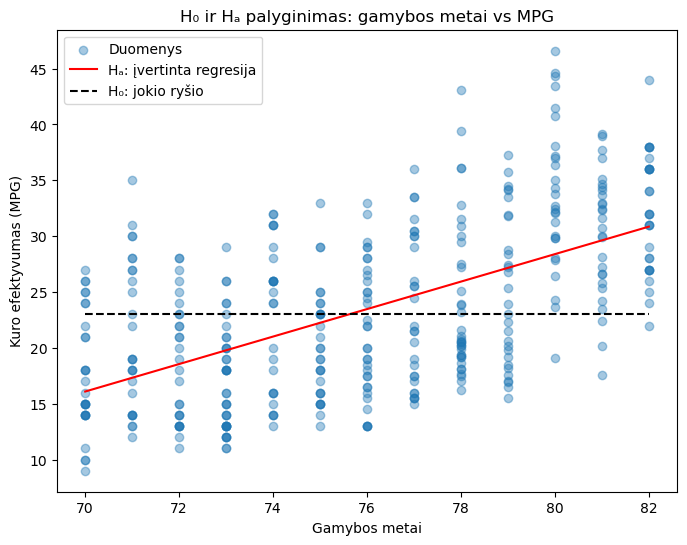

In [50]:

x = df["gamybos_metai"]
y = df["kuro_sanaudos"]

# Reali regresija
coef = np.polyfit(x, y, 1)
y_hat = coef[0] * x + coef[1]

# H0 linija (nuolydis = 0)
y_h0 = np.full_like(x, y.mean())

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.4, label="Duomenys")
plt.plot(x, y_hat, color="red", label="Hₐ: įvertinta regresija")
plt.plot(x, y_h0, color="black", linestyle="--", label="H₀: jokio ryšio")

plt.xlabel("Gamybos metai")
plt.ylabel("Kuro efektyvumas (MPG)")
plt.title("H₀ ir Hₐ palyginimas: gamybos metai vs MPG")
plt.legend()
plt.show()


### Pearson koreliacijos rezultatai

Pearson koreliacijos analizė buvo taikoma įvertinti ryšį tarp **automobilių gamybos metų** ir **kuro efektyvumo (MPG)**.

- **Koreliacijos koeficientas (r):** 0.58  
- **p-reikšmė:** 1.08 × 10⁻³⁶

#### Sprendimas dėl hipotezių

Kadangi **p-reikšmė ≪ 0.05**, nulinė hipotezė (**H₀**) yra **atmetama**.

#### Išvada

Egzistuoja **statistiškai reikšmingas, vidutinio stiprumo teigiamas ryšys** tarp automobilių gamybos metų ir kuro efektyvumo (MPG).  
Tai reiškia, kad **naujesni automobiliai vidutiniškai pasižymi didesniu kuro efektyvumu**.

### Praktinė interpretacija

Gamybos metai paaiškina reikšmingą dalį kuro efektyvumo variacijos, tačiau ryšys nėra tobulas.  
Tai rodo, kad kuro efektyvumui taip pat svarbūs kiti veiksniai, tokie kaip **svoris**, **variklio galia** ir **cilindrų skaičius**.


Bell curve: H₀ vs Hₐ (intuityvus vaizdavimas)
Idėja

H₀: tikras koreliacijos koeficientas = 0

Hₐ: tikras koreliacijos koeficientas ≠ 0

Varpo kreivė – testinės statistikos (z arba t) pasiskirstymas

Kritinė riba apibrėžiama pagal α = 0.05

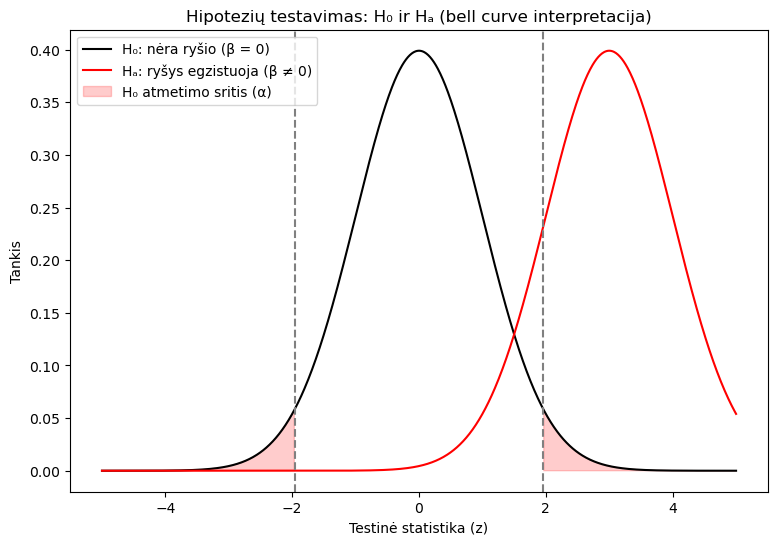

In [36]:
from scipy.stats import norm

# x ašis (testinė statistika)
x = np.linspace(-5, 5, 1000)

# H0 pasiskirstymas (standartinis normalus)
y_h0 = norm.pdf(x, loc=0, scale=1)

# "Ha" – pastumtas pasiskirstymas (iliustracijai)
y_ha = norm.pdf(x, loc=3, scale=1)

# Kritinės ribos (alpha = 0.05, dvipusis testas)
z_crit = norm.ppf(0.975)

plt.figure(figsize=(9, 6))

# Kreivės
plt.plot(x, y_h0, label="H₀: nėra ryšio (β = 0)", color="black")
plt.plot(x, y_ha, label="Hₐ: ryšys egzistuoja (β ≠ 0)", color="red")

# Kritinės ribos
plt.axvline(-z_crit, color="grey", linestyle="--")
plt.axvline(z_crit, color="grey", linestyle="--")

# Pažymim atmestino regiono sritis
plt.fill_between(
    x, y_h0,
    where=(x <= -z_crit) | (x >= z_crit),
    color="red",
    alpha=0.2,
    label="H₀ atmetimo sritis (α)"
)

plt.xlabel("Testinė statistika (z)")
plt.ylabel("Tankis")
plt.title("Hipotezių testavimas: H₀ ir Hₐ (bell curve interpretacija)")
plt.legend()
plt.show()





Juoda kreivė (H₀) rodo, kur dažniausiai būtų statistika, jei ryšio nebūtų

Raudona kreivė (Hₐ) – kur būtų statistika, jei ryšys egzistuoja

Raudonos zonos – sritys, kuriose H₀ atmetama

Mūsų atveju:

p ≈ 10⁻³⁶

statistika būtų labai toli dešinėje

todėl H₀ atmetama praktiškai be rizikos